In [4]:
!pip3 install platypus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from platypus import Problem, EpsNSGAII, Real, ProcessPoolEvaluator
import csv
import logging
from itertools import chain
logging.basicConfig(level=logging.INFO)
plt.rcParams['figure.figsize'] = [12, 8]
# sys.path.append('..')

In [10]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Lake_problem/')

ValueError: ignored

In [9]:
sys.path.append(os.path.abspath('..'))
from dps_lake_model import dps_lake_model
import rbf_functions
# output_dir = f"./output/{rbf}/"

ImportError: ignored

In [ ]:
entry = rbf_functions.original_rbf
name = entry.__name__

# load variables from refset
varlist = []
variables = []
output_dir = os.path.abspath('../notebooks/refsets/')
for filename in os.listdir(output_dir):
    if filename == f'{name}_refset_variables.csv':
        varlist.append(filename[:-4])
        df_vars = pd.read_csv(f"{output_dir}\{filename}")
        
variables = df_vars.values
        
for filename in os.listdir('../data1999'):
    if filename.startswith('w'):
        globals()[f"{filename[:-4]}"] = np.loadtxt(f'../data1999/{filename}')
        
print(f"Loaded: {', '.join(varlist)}")

Loaded: original_rbf_refset_variables


In [ ]:
# output_dir = os.path.abspath('../output')
# print(output_dir)

# # for filename in os.listdir('../data1999'):
# #     if filename.startswith('w'):
# #         globals()[f"{filename[:-4]}"] = np.loadtxt(f'data1999/{filename}')

# # load variables 
# varlist = []
# variables = []
# # for filename in os.listdir('data'):
# #     if filename.endswith('variables.csv'):
# #         varlist.append(filename[:-4])
# #         df_temp = pd.read_csv(f"output/{filename}", header=None)
# #         variables.append(df_temp.values.tolist())
# # variables = list(chain.from_iterable(variables))
# for filename in os.listdir(output_dir):
#     if filename.endswith('variables.csv'):
#         varlist.append(filename[:-4])
#         df_temp = pd.read_csv(f"{output_dir}{filename}", header=None)
#         variables.append(df_temp.values.tolist())
# variables = list(chain.from_iterable(variables))
# print(f"Loaded: {', '.join(varlist)}")

In [ ]:
n_inputs = 2  # (time, storage of Conowingo)
n_outputs = 4 # Atomic, Baltimore, Chester, Downstream:- (hydropower, environmental)
n_rbfs = n_inputs+2
rbf = rbf_functions.RBF(n_rbfs, n_inputs, n_outputs, rbf_function=entry)

# Initialize model
nobjs = 6
n_years = 1
susquehanna_river = SusquehannaModel(108.5, 505.0, 5, n_years, 
                                    rbf)  # l0, l0_MR, d0, years
# l0 = start level cono, l0_MR = start level muddy run, d0 = startday > friday = 5
susquehanna_river.set_log(True)
# susquehanna_river.setRBF(numberOfRBF, numberOfInput, numberOfOutput, RBFType)
output=[]
for dvars in variables:
    output.append(susquehanna_river.evaluate(dvars))
    
level_CO, level_MR, ratom, rbalt, rches, renv = susquehanna_river.get_log()

In [ ]:
pd.DataFrame(data=output, columns=[['Hydropower','AtomicPowerPlant','Baltimore','Chester','Environment', 'Recreation']])

,Hydropower,AtomicPowerPlant,Baltimore,Chester,Environment,Recreation
0,69.394721,0.906201,0.525242,0.635952,0.081752,1.0
1,56.748746,0.467605,0.326137,0.335062,0.064412,1.0
2,67.585114,0.756048,0.564585,0.594769,0.077092,1.0
3,68.241955,0.710361,0.301054,0.482444,0.075095,1.0
4,47.738964,0.337893,0.319306,0.196077,0.033517,1.0


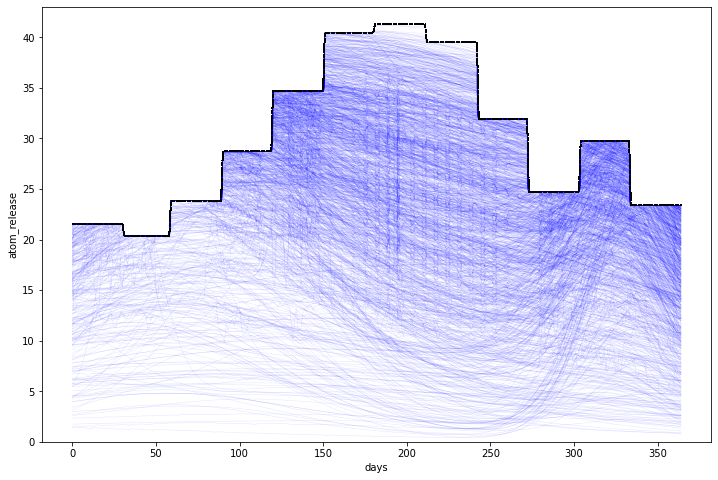

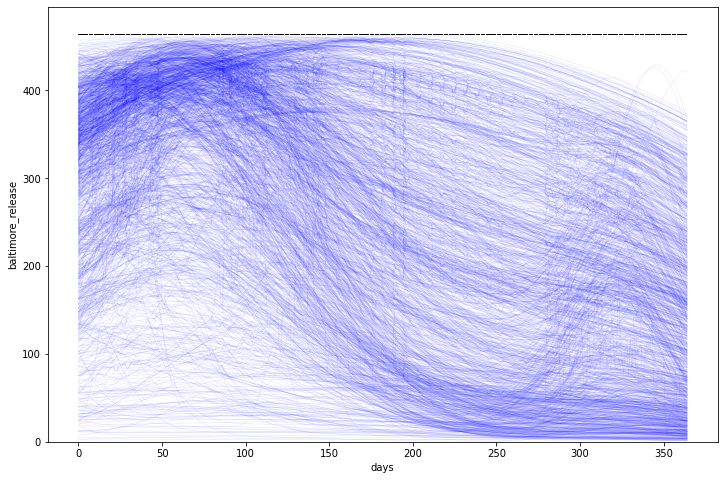

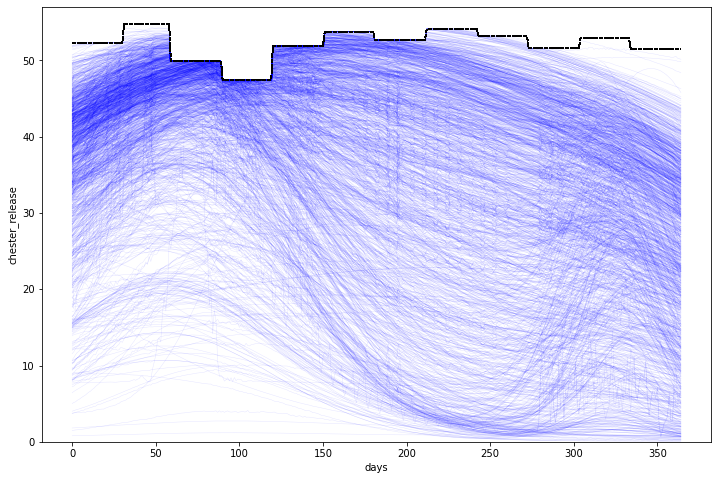

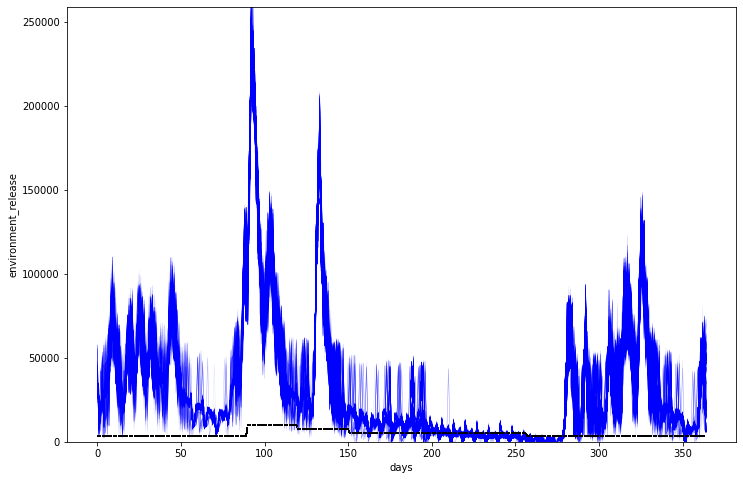

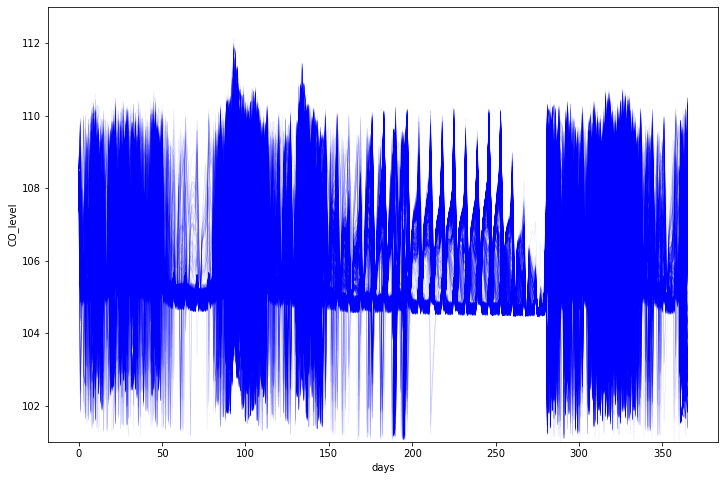

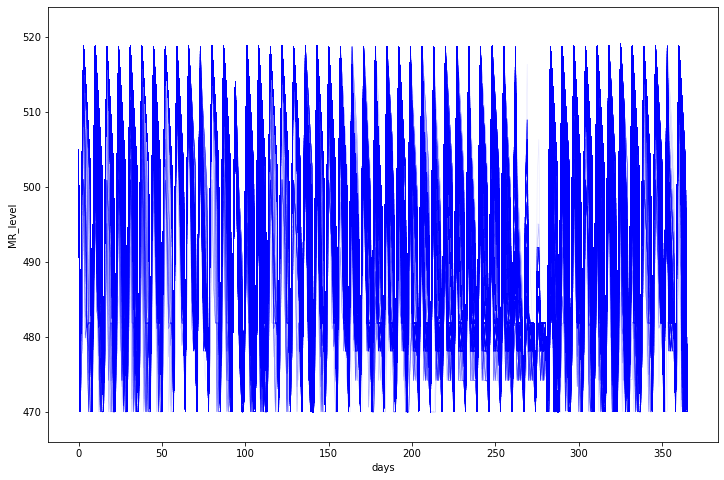

In [ ]:
from susquehanna_model import create_path

if not os.path.exists(f'figs/{name}/releases'):
    os.makedirs(f'figs/{name}/releases')
# load demand
demand_directory = create_path('data1999')
for filename in os.listdir(demand_directory):
    if filename.startswith('w'):
        globals()[f"{filename[:-4]}"] = np.loadtxt(os.path.join(demand_directory, filename))
    elif filename == 'min_flow_req.txt':
        globals()[f"{filename[:-4]}"] = np.loadtxt(os.path.join(demand_directory, filename))

alpha = 0.1
lw = 0.5
for release in ratom:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.plot(wAtomic, "black", ls = "--", linewidth=1) 
   plot = plt.xlabel('days')
   plot = plt.ylabel('atom_release')
   plot = plt.ylim((0, 43))
plt.savefig(f'figs/{name}/releases/{name}_ratom.jpg')
plt.show()

for release in rbalt:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.plot(wBaltimore, "black", ls = "--", linewidth=1) 
   plot = plt.xlabel('days')
   plot = plt.ylabel('baltimore_release')
   plot = plt.ylim((0, 495))
plt.savefig(f'figs/{name}/releases/{name}_rbalt.jpg')
plt.show()

for release in rches:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.plot(wChester, "black", ls = "--", linewidth=1) 
   plot = plt.xlabel('days')
   plot = plt.ylabel('chester_release')
   plot = plt.ylim((0, 57))
plt.savefig(f'figs/{name}/releases/{name}_rches.jpg')
plt.show()

for release in renv:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.plot(min_flow_req, "black", ls = "--", linewidth=1) 
   plot = plt.xlabel('days')
   plot = plt.ylabel('environment_release')
   plot = plt.ylim((0, 259000))
plt.savefig(f'figs/{name}/releases/{name}_renv.jpg')
plt.show()

for year in level_CO:
   plot = plt.plot(year, "blue", linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('CO_level')
   plot = plt.ylim((101, 113))
plt.savefig(f'figs/{name}/releases/{name}_levelco.jpg')
plt.show()

for year in level_MR:
   plot = plt.plot(year, "blue", linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('MR_level')
   plot = plt.ylim((466, 524))
plt.savefig(f'figs/{name}/releases/{name}_levelmr.jpg')
plt.show()

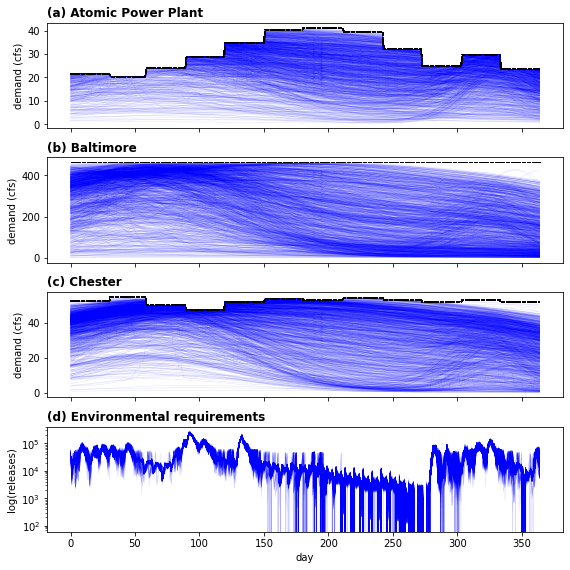

In [ ]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8,8)) #
for release in ratom:
    ax[0].plot(release, "blue", linewidth=lw, alpha=alpha)
    ax[0].plot(wAtomic, "black", ls = "--", linewidth=1)
    ax[0].set_title("(a) Atomic Power Plant", loc='left', weight='bold')
    ax[0].set_ylabel("demand (cfs)")
for release in rbalt:
    ax[1].plot(release, "blue", linewidth=lw, alpha=alpha)
    ax[1].plot(wBaltimore, "black", ls = "--", linewidth=1)
    ax[1].set_title("(b) Baltimore", loc='left', weight='bold')
    ax[1].set_ylabel("demand (cfs)")
for release in rches:
    ax[2].plot(release, "blue", linewidth=lw, alpha=alpha)
    ax[2].plot(wChester, "black", ls = "--", linewidth=1) 
    ax[2].set_title("(c) Chester", loc='left', weight='bold')
    ax[2].set_ylabel("demand (cfs)")
for release in renv:
    ax[3].plot(release, "blue", linewidth=lw, alpha=alpha)
#     ax[3].plot(min_flow_req, "black", ls = "--", linewidth=1) 
    ax[3].set_ylabel("log(releases)")
    ax[3].set_title("(d) Environmental requirements", loc='left', weight='bold')
#     ax[3].set_title("x$10^3$", loc='left')
    ax[3].set_yscale('log')
    ax[3].set_xlabel("day")
fig.tight_layout(pad=1.0)

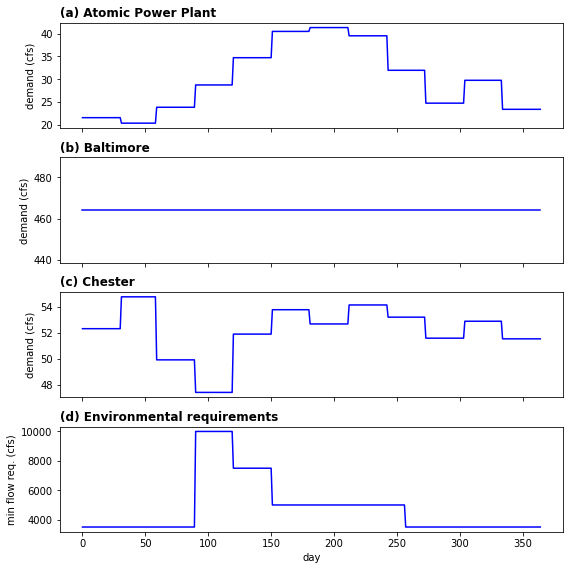

In [ ]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8,8)) #

ax[0].plot(wAtomic, "blue")
ax[0].set_ylabel("demand (cfs)")
ax[0].set_title("(a) Atomic Power Plant", loc='left', weight='bold')
ax[1].plot(wBaltimore, "blue")
ax[1].set_ylabel("demand (cfs)")
ax[1].set_title("(b) Baltimore", loc='left', weight='bold')
ax[2].plot(wChester, "blue")
ax[2].set_ylabel("demand (cfs)")
ax[2].set_title("(c) Chester", loc='left', weight='bold')
ax[3].plot(min_flow_req, "blue")
ax[3].set_ylabel("min flow req. (cfs)")
ax[3].set_title("(d) Environmental requirements", loc='left', weight='bold')
ax[3].set_xlabel("day")
fig.tight_layout(pad=1.0)

# plot = plt.plot(wAtomic, "blue") 
# plot = plt.plot(wBaltimore, "blue")
# plot = plt.plot(wChester, "blue")
# plot = plt.plot(min_flow_req, "blue")

plt.savefig('figs/release_requirements.jpg')

Loaded: original_rbf_refset_variables
Loaded: squared_exponential_rbf_refset_variables
Loaded: inverse_quadratic_rbf_refset_variables
Loaded: inverse_multiquadric_rbf_refset_variables
Loaded: exponential_rbf_refset_variables
Loaded: matern32_rbf_refset_variables
Loaded: matern52_rbf_refset_variables


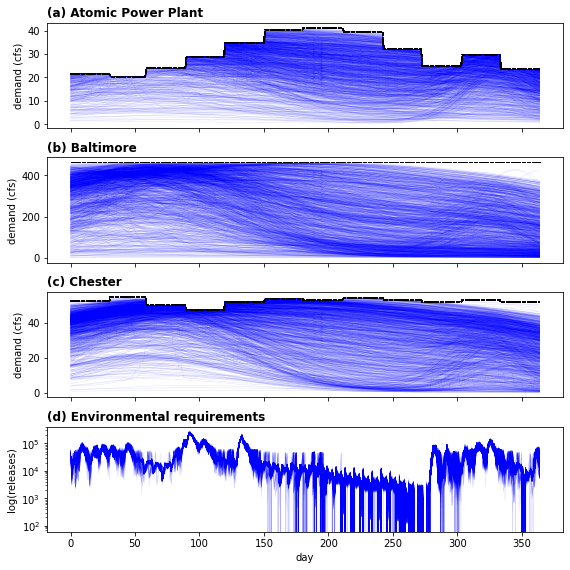

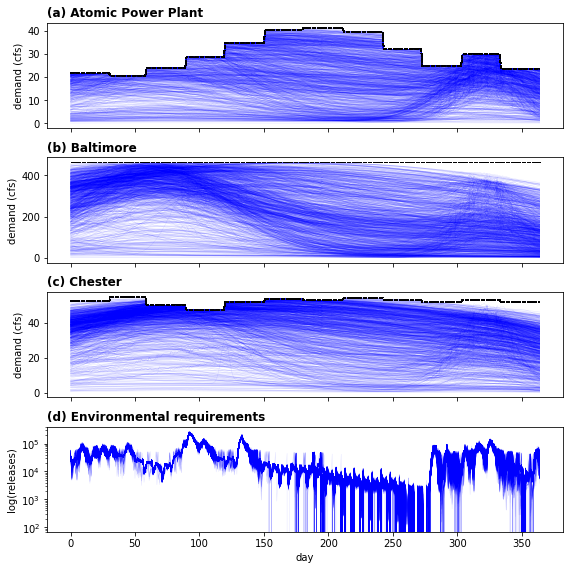

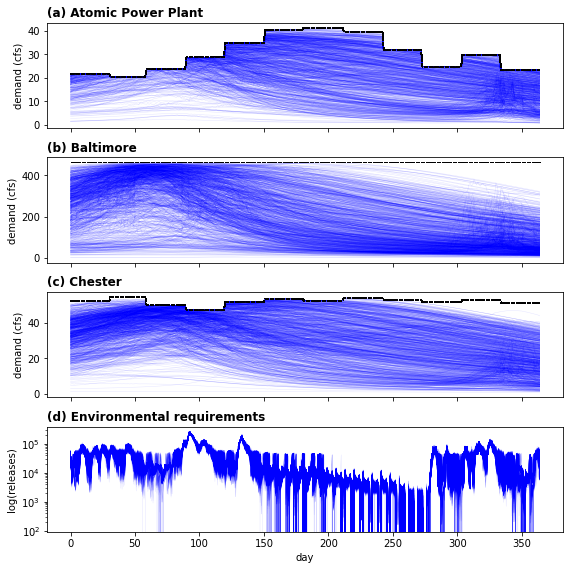

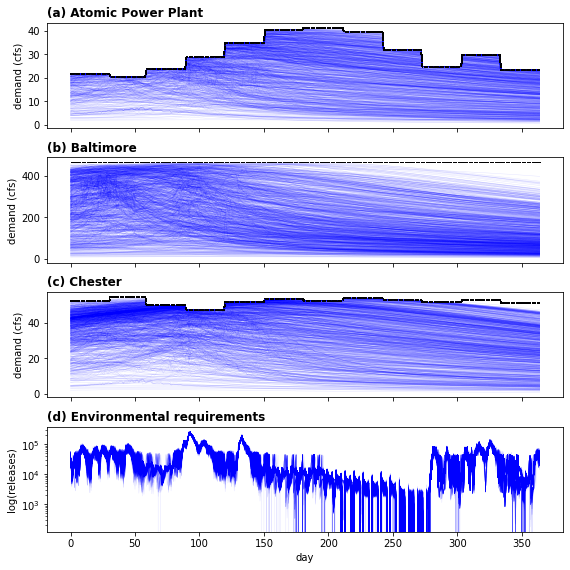

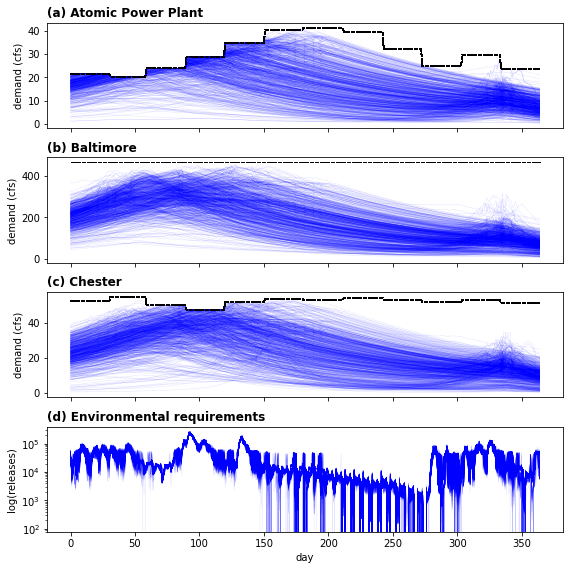

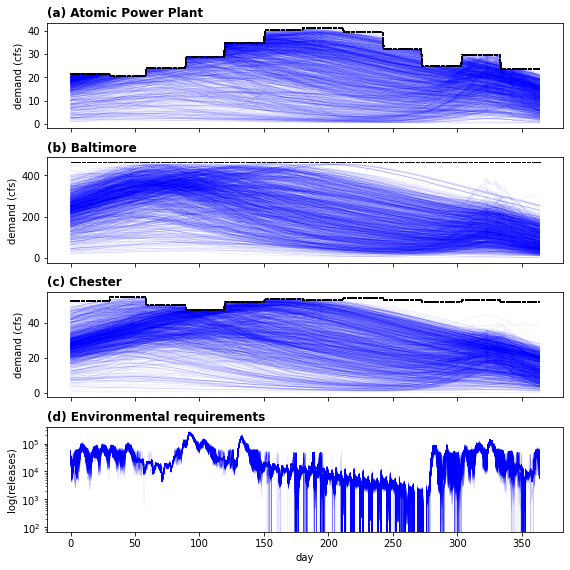

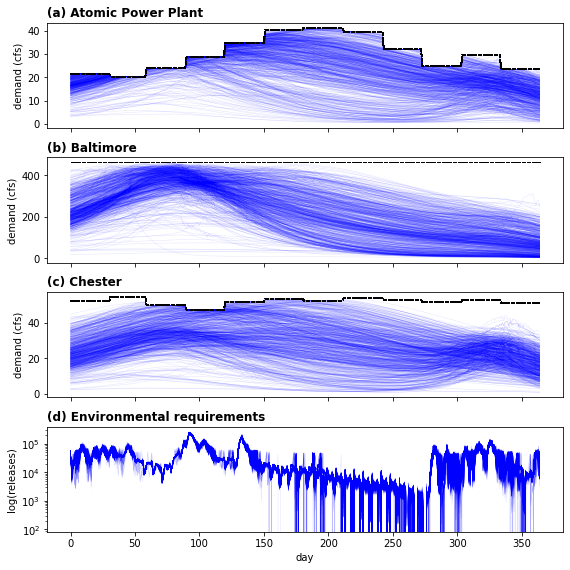

In [ ]:
from susquehanna_model import create_path

rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

# load demand
demand_directory = create_path('data1999')
for filename in os.listdir(demand_directory):
    if filename.startswith('w'):
        globals()[f"{filename[:-4]}"] = np.loadtxt(os.path.join(demand_directory, filename))
    elif filename == 'min_flow_req.txt':
        globals()[f"{filename[:-4]}"] = np.loadtxt(os.path.join(demand_directory, filename))

for entry in rbfs:
    name = entry.__name__
    if not os.path.exists(f'figs/{name}/releases'):
        os.makedirs(f'figs/{name}/releases')
        
    # load variables
    varlist = []
    variables = []

    output_dir = os.path.abspath('../notebooks/refsets/')
    for filename in os.listdir(output_dir):
        if filename == f'{name}_refset_variables.csv':
            varlist.append(filename[:-4])
            df_vars = pd.read_csv(f"{output_dir}\{filename}")

    variables = df_vars.values

    for filename in os.listdir('../data1999'):
        if filename.startswith('w'):
            globals()[f"{filename[:-4]}"] = np.loadtxt(f'../data1999/{filename}')

    print(f"Loaded: {', '.join(varlist)}")

    numberOfRBF = 6  # numberOfInput + 2
    n_inputs = 2  # (time, storage of Conowingo)
    n_outputs = 4 # Atomic, Baltimore, Chester, Downstream:- (hydropower, environmental)
    n_rbfs = n_inputs+2
    rbf = rbf_functions.RBF(n_rbfs, n_inputs, n_outputs, rbf_function=entry)

    # Initialize model
    nobjs = 6
    n_years = 1
    susquehanna_river = SusquehannaModel(108.5, 505.0, 5, n_years, rbf)  # l0, l0_MR, d0, years
    # l0 = start level cono, l0_MR = start level muddy run, d0 = startday > friday = 5
    susquehanna_river.set_log(True)
    # susquehanna_river.setRBF(numberOfRBF, numberOfInput, numberOfOutput, RBFType)

    for dvars in variables:
        susquehanna_river.evaluate(dvars)

    level_CO, level_MR, ratom, rbalt, rches, renv = susquehanna_river.get_log()

    fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8,8)) #
    for release in ratom:
        ax[0].plot(release, "blue", linewidth=lw, alpha=alpha)
        ax[0].plot(wAtomic, "black", ls = "--", linewidth=1)
        ax[0].set_title("(a) Atomic Power Plant", loc='left', weight='bold')
        ax[0].set_ylabel("demand (cfs)")
    for release in rbalt:
        ax[1].plot(release, "blue", linewidth=lw, alpha=alpha)
        ax[1].plot(wBaltimore, "black", ls = "--", linewidth=1)
        ax[1].set_title("(b) Baltimore", loc='left', weight='bold')
        ax[1].set_ylabel("demand (cfs)")
    for release in rches:
        ax[2].plot(release, "blue", linewidth=lw, alpha=alpha)
        ax[2].plot(wChester, "black", ls = "--", linewidth=1) 
        ax[2].set_title("(c) Chester", loc='left', weight='bold')
        ax[2].set_ylabel("demand (cfs)")
    for release in renv:
        ax[3].plot(release, "blue", linewidth=lw, alpha=alpha)
    #     ax[3].plot(min_flow_req, "black", ls = "--", linewidth=1) 
        ax[3].set_ylabel("log(releases)")
        ax[3].set_title("(d) Environmental requirements", loc='left', weight='bold')
    #     ax[3].set_title("x$10^3$", loc='left')
        ax[3].set_yscale('log')
        ax[3].set_xlabel("day")
    fig.tight_layout(pad=1.0)
    plt.savefig(f'figs/{name}/releases/{name}_releases.jpg')